# Dependencies

In [1]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data preparation

## Importing as shown in the assignment description

### Occupancy preparation

In [3]:
# Importing the occupancy datasets
occu_train = np.loadtxt("./OccupancyTrain.csv", delimiter=",")
occu_test = np.loadtxt("./OccupancyTest.csv", delimiter=",")

In [4]:
# Seperating occupancy columns
# X,y train
X_occu_train = occu_train[:,:-1]
y_occu_train = occu_train[:,-1]

# X,y test
X_occu_test = occu_test[:,:-1]
y_occu_test = occu_test[:,-1]

In [5]:
print(f"TRAIN:\n{occu_train[:5]}")
print(f"TEST:\n{occu_test[:5]}")

TRAIN:
[[2.12900000e+01 2.11000000e+01 0.00000000e+00 5.92500000e+02
  3.29728301e-03 0.00000000e+00]
 [2.21000000e+01 2.66000000e+01 4.64000000e+02 1.07325000e+03
  4.37533647e-03 1.00000000e+00]
 [1.93900000e+01 2.72000000e+01 0.00000000e+00 4.63000000e+02
  3.78267630e-03 0.00000000e+00]
 [2.06000000e+01 1.95000000e+01 0.00000000e+00 4.35000000e+02
  2.91889106e-03 0.00000000e+00]
 [2.15000000e+01 3.35000000e+01 4.75250000e+02 1.28150000e+03
  5.31998192e-03 1.00000000e+00]]
TEST:
[[2.31000000e+01 2.97000000e+01 4.66500000e+02 1.22466667e+03
  5.19787030e-03 1.00000000e+00]
 [1.97900000e+01 3.62000000e+01 2.40000000e+01 5.07500000e+02
  5.17246151e-03 0.00000000e+00]
 [2.03900000e+01 3.22900000e+01 0.00000000e+00 6.84000000e+02
  4.78540457e-03 0.00000000e+00]
 [2.15000000e+01 3.20900000e+01 4.40250000e+02 6.19000000e+02
  5.09423237e-03 1.00000000e+00]
 [2.12900000e+01 2.66833333e+01 4.54000000e+02 8.95166667e+02
  4.17564415e-03 1.00000000e+00]]


### Weed preparation

In [6]:
# Importing the weed dataset
weed_train = np.loadtxt("./IDSWeedCropTrain.csv", delimiter=",")
weed_test = np.loadtxt("./IDSWeedCropTest.csv", delimiter=",")

In [7]:
# Seperating weed columns
# X,y train
X_weed_train = weed_train[:,:-1]
y_weed_train = weed_train[:,-1]

# X,y test
X_weed_test = weed_test[:,:-1]
y_weed_test = weed_test[:,-1]

In [8]:
# Data normalization
occu_norm = np.divide((occu_train - np.mean(occu_train, axis=0)), np.std(occu_train, axis=0))
weed_norm = np.divide((weed_train - np.mean(weed_train, axis=0)), np.std(weed_train, axis=0))

# Exercise 1

In [9]:
'''
Implementation of PCA function
'''
def PCA(data):    
    # Find covariance matrix
    cov_matrix = np.cov(data.T)

    # Find eigenvectors and eigenvalues
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    
    # Sorting in monotomically decreasing order
    sorting_idxs = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorting_idxs]
    eigenvectors = eigenvectors[:,sorting_idxs]
    
    # Variance
    var_covering = np.divide(eigenvalues, np.sum(eigenvalues))
    return eigenvectors, var_covering*100

([<matplotlib.axis.XTick at 0x17e661060>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5')])

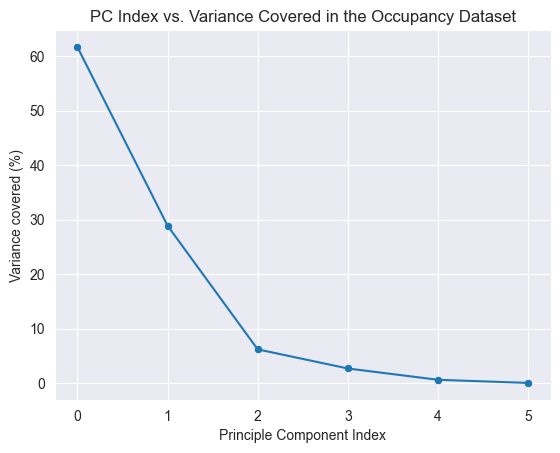

In [10]:
'''
Occupancy dataset
Function run and visualization
'''
# Running the PCA function
occu_unit_vector, occu_var_covering = PCA(occu_norm)

# Plotting variance vs pc index
sns.set_style("darkgrid")
sns.lineplot(x=range(len(occu_unit_vector)), y=occu_var_covering)
sns.scatterplot(x=range(len(occu_unit_vector)), y=occu_var_covering)
plt.grid(True)
plt.title("PC Index vs. Variance Covered in the Occupancy Dataset")
plt.xlabel("Principle Component Index")
plt.ylabel("Variance covered (%)")
plt.xticks(range(len(occu_unit_vector)))

([<matplotlib.axis.XTick at 0x17ed121d0>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13')])

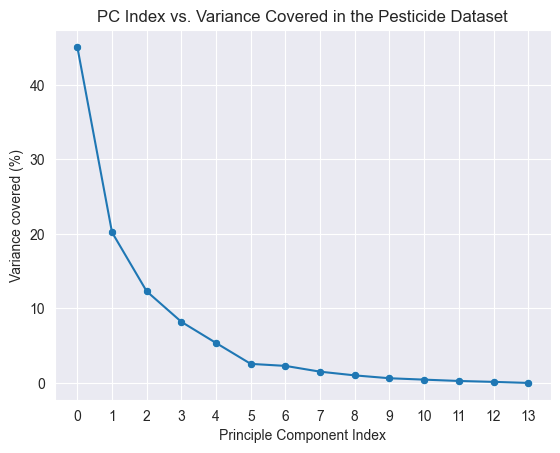

In [11]:
'''
Pesticide dataset
Function run and visualization
'''
# Running the PCA function
weed_unit_vector, weed_var_covering = PCA(weed_norm)

# Plotting variance vs. pc index
sns.set_style("darkgrid")
sns.lineplot(x=range(len(weed_unit_vector)), y=weed_var_covering)
sns.scatterplot(x=range(len(weed_unit_vector)), y=weed_var_covering)
plt.grid(True)
plt.title("PC Index vs. Variance Covered in the Pesticide Dataset")
plt.xlabel("Principle Component Index")
plt.ylabel("Variance covered (%)")
plt.xticks(range(len(weed_unit_vector)))

([<matplotlib.axis.XTick at 0x17edb3f10>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13')])

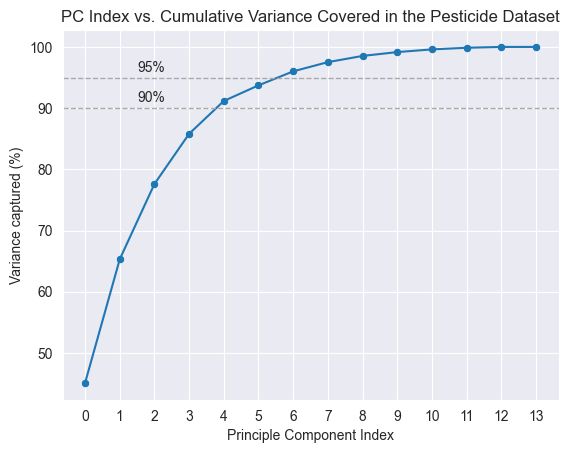

In [12]:
# Cumulative variance
weed_cumulative_variance = np.cumsum(weed_var_covering) / np.sum(occu_var_covering)

# Plotting cumulative variance vs. pc index
sns.set_style("darkgrid")
sns.lineplot(x=range(len(weed_unit_vector)), y=weed_cumulative_variance*100)
sns.scatterplot(x=range(len(weed_unit_vector)), y=weed_cumulative_variance*100)
plt.grid(True)
plt.title("PC Index vs. Cumulative Variance Covered in the Pesticide Dataset")
plt.xlabel("Principle Component Index")
plt.ylabel("Variance captured (%)")
plt.axhline(y=90, color="darkgray", linestyle="--", linewidth=1)
plt.axhline(y=95, color="darkgray", linestyle="--", linewidth=1)
plt.text(x=1.5, y=91, s="90%")
plt.text(x=1.5, y=96, s="95%")
plt.xticks(range(len(weed_unit_vector)))


# Exercise 2

In [21]:
def projection(projection_data):
    unit_vectors, _ = PCA(projection_data)
    data_pca = np.dot(projection_data, unit_vectors)

    # Create a scatter plot of the projected data
    sns.set_style("darkgrid")
    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        x=data_pca[:, 0],
        y=data_pca[:, 1],
        edgecolor="k",
    )

    plt.title('2D Projection of the data')
    plt.xlabel('PC2')
    plt.ylabel('PC2')
    plt.grid(True)


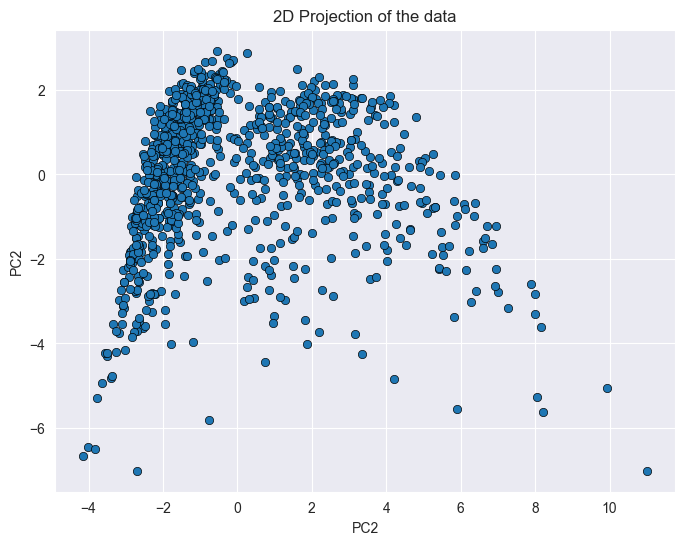

In [22]:
projection(weed_norm)

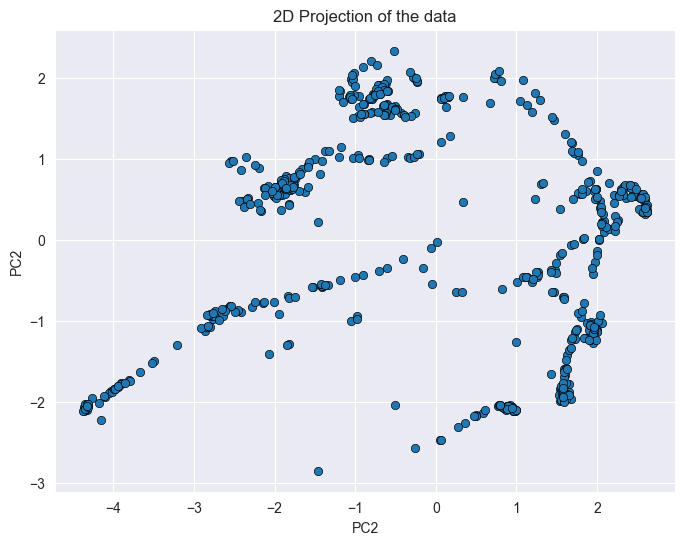

In [23]:
projection(occu_norm)